In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

C:\Users\Martin.Berberi\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('dataset/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


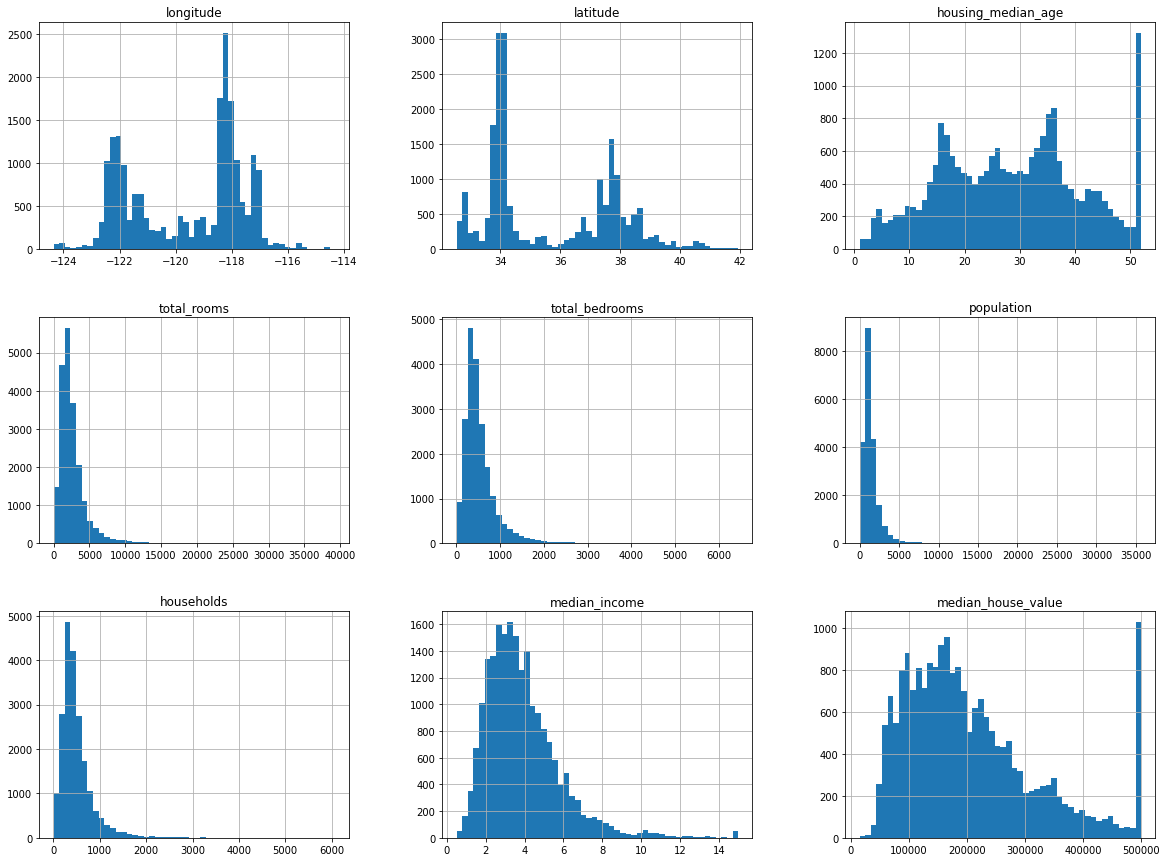

In [7]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

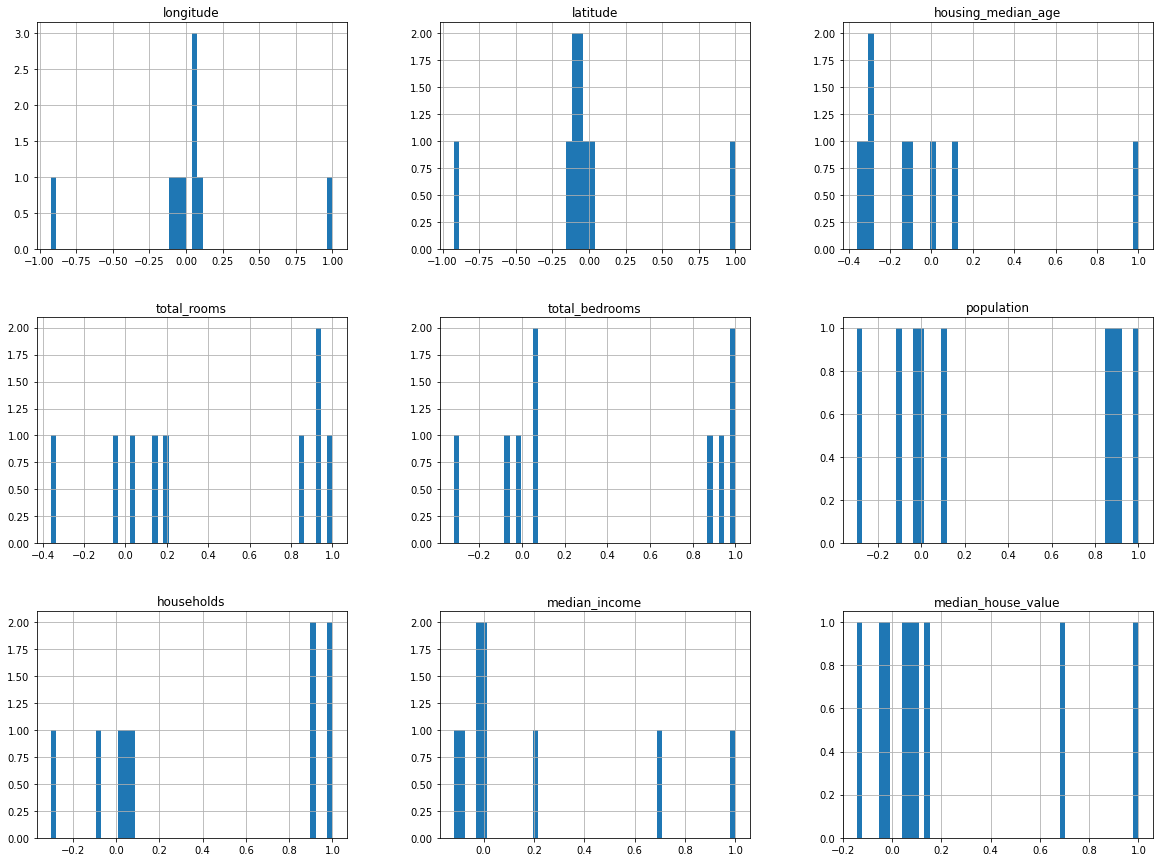

In [8]:
df.corr().hist(bins = 50, figsize = (20,15))
plt.show()

In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.shape

(20433, 10)

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
df = pd.get_dummies(df)

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [15]:
scale_col = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
scaler = MinMaxScaler()
df[scale_col] = scaler.fit_transform(df[scale_col])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0,0,0,1,0


In [16]:
X = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
# Example: Train a RandomForest model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)

                       Feature  Importance
7                median_income    0.482960
9       ocean_proximity_INLAND    0.142953
0                    longitude    0.112155
1                     latitude    0.111315
2           housing_median_age    0.055223
5                   population    0.027411
3                  total_rooms    0.019986
4               total_bedrooms    0.019687
6                   households    0.017406
8    ocean_proximity_<1H OCEAN    0.005213
12  ocean_proximity_NEAR OCEAN    0.003069
11    ocean_proximity_NEAR BAY    0.001940
10      ocean_proximity_ISLAND    0.000681


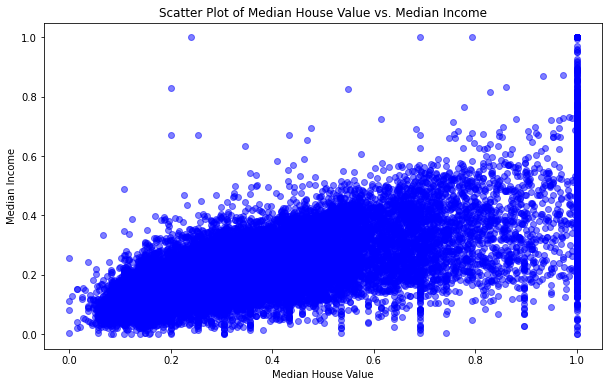

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['median_house_value'], df['median_income'], color='blue', alpha=0.5)
# Adding titles and labels
plt.title('Scatter Plot of Median House Value vs. Median Income')
plt.xlabel('Median House Value')  # X-axis title
plt.ylabel('Median Income')        # Y-axis title
plt.show()

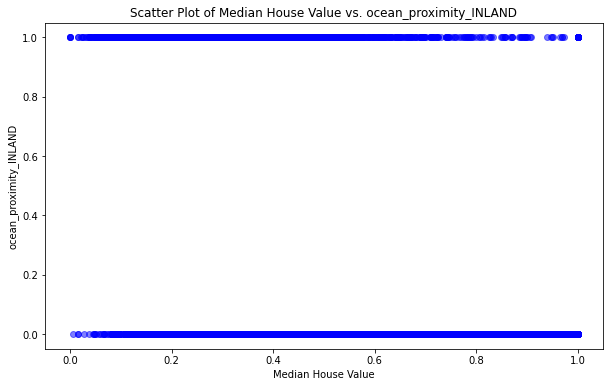

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['median_house_value'], df['ocean_proximity_INLAND'], color='blue', alpha=0.5)
# Adding titles and labels
plt.title('Scatter Plot of Median House Value vs. ocean_proximity_INLAND')
plt.xlabel('Median House Value')  # X-axis title
plt.ylabel('ocean_proximity_INLAND')        # Y-axis title
plt.show()

In [21]:
tree_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix

In [23]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, tree_pred)
mse = mean_squared_error(y_test, tree_pred)
r2 = r2_score(y_test, tree_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
R-squared (R²): 0.66


Try XGBoost with RandomizedCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold
import xgboost

In [25]:
'''xgb_model = xgboost.XGBRegressor(learning_rate = 0.02, n_estimators = 600, silent = True, nthread = 1)

params = {
    'learning_rate': [0.05, 0.10, 0.15, 0.2, 0.25, 0.3, 0.5],
    'max_depth': [2,3,4,5,6,8,10,12,15],
    'min_child_weight': [1,3,5,7,10],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2, 5],
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1001)

clf = RandomizedSearchCV(xgb_model, param_distributions= params, n_iter=50, scoring='roc_auc', cv = skf.split(X,y), verbose=3, n_jobs=4, random_state=34)

clf.fit(X, y)

clf.best_estimator_'''

"xgb_model = xgboost.XGBRegressor(learning_rate = 0.02, n_estimators = 600, silent = True, nthread = 1)\n\nparams = {\n    'learning_rate': [0.05, 0.10, 0.15, 0.2, 0.25, 0.3, 0.5],\n    'max_depth': [2,3,4,5,6,8,10,12,15],\n    'min_child_weight': [1,3,5,7,10],\n    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2, 5],\n}\n\nskf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1001)\n\nclf = RandomizedSearchCV(xgb_model, param_distributions= params, n_iter=50, scoring='roc_auc', cv = skf.split(X,y), verbose=3, n_jobs=4, random_state=34)\n\nclf.fit(X, y)\n\nclf.best_estimator_"

In [26]:
from sklearn.ensemble import RandomForestRegressor 

In [27]:
random = RandomForestRegressor()
random.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
random_pred = random.predict(X_test)

In [29]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, random_pred)
mse = mean_squared_error(y_test, random_pred)
r2 = r2_score(y_test, random_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
R-squared (R²): 0.82


In [30]:
opt_random = RandomForestRegressor(n_estimators = 600)

params = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [None, 2, 3, 4, 5, 6, 8, 10, 12, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use KFold for regression
kf = KFold(n_splits=5, shuffle=True, random_state=1001)

# Perform Randomized Search
clf = RandomizedSearchCV(opt_random, param_distributions=params, n_iter=50, scoring='neg_mean_squared_error', cv=kf, verbose=3, n_jobs=4, random_state=34)

# Fit the model
clf.fit(X, y)

# Get the best estimator
best_estimator = clf.best_estimator_
print(best_estimator)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=500)


In [31]:
best_estimator.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=500)

In [32]:
prediction = best_estimator.predict(X_test)

In [33]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
R-squared (R²): 0.82


In [34]:
import numpy as np
import statsmodels.api as sm

# Fit your model (if using statsmodels, e.g., OLS)
X_with_const = sm.add_constant(X_train)  # Add a constant for intercept
model = sm.OLS(y_train, X_with_const).fit()

# Get predictions and standard errors
predictions = model.get_prediction(sm.add_constant(X))
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% prediction interval

# The 'obs_ci_lower' and 'obs_ci_upper' columns provide the lower and upper bounds
print(pred_summary[['mean', 'obs_ci_lower', 'obs_ci_upper']])


           mean  obs_ci_lower  obs_ci_upper
0      0.811561      0.531478      1.091643
1      0.823481      0.543344      1.103619
2      0.749600      0.469542      1.029657
3      0.631322      0.351294      0.911350
4      0.494225      0.214207      0.774244
...         ...           ...           ...
20635  0.034988     -0.245049      0.315026
20636  0.087655     -0.192378      0.367687
20637  0.050278     -0.229745      0.330302
20638  0.072803     -0.207210      0.352816
20639  0.109236     -0.170774      0.389247

[20433 rows x 3 columns]


In [35]:
df.shape

(20433, 14)

In [36]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0,0,0,1,0


In [37]:
prediction = best_estimator.predict(X)

In [38]:
df['Prediction'] = prediction

In [39]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,Prediction
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0,0,0,1,0,0.880855
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0,0,0,1,0,0.787148
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0,0,0,1,0,0.742948
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0,0,0,1,0,0.712871
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0,0,0,1,0,0.524782


In [40]:
df['Prediction Probability'] =pred_summary['mean']

In [41]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,Prediction,Prediction Probability
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0,0,0,1,0,0.880855,0.811561
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0,0,0,1,0,0.787148,0.823481
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0,0,0,1,0,0.742948,0.749600
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0,0,0,1,0,0.712871,0.631322
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0,0,0,1,0,0.524782,0.494225


In [56]:
from sqlalchemy import create_engine
import urllib

quoted = urllib.parse.quote_plus("DRIVER=ODBC Driver 17 for SQL Server;"
                                  "Server=AZG4VZ2Z2\SQLEXPRESS;"
                                  "Database=California House Prices;"
                                  "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))
df.to_sql('California House Prices',schema = 'dbo', con = engine, if_exists = 'replace')

-1